<a href="https://colab.research.google.com/github/janicema0702/cityu-project/blob/main/adam_compiler_elderly_fall_detection_(one_hot_encoding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 

import seaborn as sns
plt.style.use('seaborn')

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  0
Tensorflow version: 2.9.2
Keras version: 2.9.0


In [ ]:

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

link = 'https://drive.google.com/file/d/1Eqhf818E-wUkrxfYnh6spB5XeyehlTwG/view'
 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np

 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('SisFall_dataset.csv') 
 
df = pd.read_csv('SisFall_dataset.csv')
print(df)

         ADXL345_x  ADXL345_y  ADXL345_z  ITG3200_x  ITG3200_y  ITG3200_z  \
0                5       -234        -82         37          4         -7   
1                2       -234        -87         35          4         -7   
2                6       -234        -84         35          3         -7   
3                5       -234        -85         34          4         -8   
4                7       -237        -83         34          4         -7   
...            ...        ...        ...        ...        ...        ...   
2097145        261       -126        -39       -161        104        883   
2097146        256       -125        -36       -166        122        894   
2097147        251       -127        -37       -177        136        906   
2097148        253       -131        -31       -185        142        925   
2097149        251       -134        -36       -173        147        944   

         MMA8451Q_x  MMA8451Q_y  MMA8451Q_z Situation  
0                 9

In [ ]:
df.shape

(2097150, 10)

In [ ]:
df.describe()

,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z,MMA8451Q_x,MMA8451Q_y,MMA8451Q_z
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06
mean,3.646227e+00,-1.685828e+02,-2.507207e+01,-1.834779e+01,2.309094e+01,-3.905765e+00,-3.491114e+01,-6.590775e+02,3.627351e-01
std,1.110372e+02,1.561922e+02,1.316931e+02,5.462312e+02,5.085745e+02,4.069697e+02,4.345957e+02,6.095223e+02,5.229338e+02
min,-4.053000e+03,-2.852000e+03,-4.096000e+03,-3.230300e+04,-1.549100e+04,-1.092600e+04,-8.192000e+03,-8.192000e+03,-8.192000e+03
25%,-1.700000e+01,-2.560000e+02,-1.020000e+02,-7.300000e+01,-1.900000e+01,-2.400000e+01,-1.090000e+02,-9.960000e+02,-2.760000e+02
50%,1.000000e+01,-2.230000e+02,-3.300000e+01,-2.800000e+01,1.500000e+01,-7.000000e+00,-1.000000e+00,-8.850000e+02,-2.600000e+01
75%,3.400000e+01,-3.000000e+01,4.600000e+01,5.900000e+01,5.800000e+01,1.200000e+01,7.800000e+01,-1.120000e+02,2.840000e+02
max,4.094000e+03,4.092000e+03,4.091000e+03,3.276700e+04,1.581900e+04,1.249100e+04,8.191000e+03,8.191000e+03,8.191000e+03


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
inputset = df.drop(columns=['MMA8451Q_x','MMA8451Q_y','MMA8451Q_z','Situation'])
inputset = inputset
inputset

,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z
0,5,-234,-82,37,4,-7
1,2,-234,-87,35,4,-7
2,6,-234,-84,35,3,-7
3,5,-234,-85,34,4,-8
4,7,-237,-83,34,4,-7
...,...,...,...,...,...,...
2097145,261,-126,-39,-161,104,883
2097146,256,-125,-36,-166,122,894
2097147,251,-127,-37,-177,136,906
2097148,253,-131,-31,-185,142,925


In [ ]:
oldoutputset = df['Situation']
outputset =[]
for i in oldoutputset:
  if i == 'Fall':
      outputset.append([1])
  else:
      outputset.append([0])


outputset = outputset
outputset

In [ ]:
inputset_train, inputset_test, outputset_train, outputset_test = train_test_split(inputset, outputset, test_size = 0.15)


#model = DecisionTreeClassifier()
#model.fit(inputset_train, outputset_train)

'''tree.export_graphviz(model, out_file = 'determine.dot',
                    feature_names = ['x','y','z'],
                    class_names = ['fall', 'safe'],
                    label='all',
                    rounded = True,
                    filled = True)'''



"tree.export_graphviz(model, out_file = 'determine.dot',\n                    feature_names = ['x','y','z'],\n                    class_names = ['fall', 'safe'],\n                    label='all',\n                    rounded = True,\n                    filled = True)"

In [ ]:
inputset_train = np.array(inputset_train)
outputset_train = np.array(outputset_train)
inputset_train.shape, outputset_train .shape

((1782577, 6), (1782577, 1))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 128
epochs = 100

#Early Stopping callback function
es = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    mode = 'max',
    restore_best_weights = True
)

In [ ]:
num_classes = 2
train_one_hot = tf.keras.utils.to_categorical(outputset_train, num_classes)
test_one_hot = tf.keras.utils.to_categorical(outputset_test, num_classes)

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow
from tensorflow.keras.layers import * 
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

inputshape = [6]

inputs = tensorflow.keras.Input(shape=inputshape)
x = Dense(units = 100, activation = 'relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.1))(x)
output = Dense(units = num_classes, activation = 'softmax')(x)



In [ ]:
model = tf.keras.Model(
    inputs = inputs, outputs = output,
    name = 'dnn_fall_model'
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = 'Adam'

)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy'],

)

model.summary()

Model: "dnn_fall_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 100)               700       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7,294
Trainable params: 7,294
Non-trainable params: 0
_________________________________________________________________


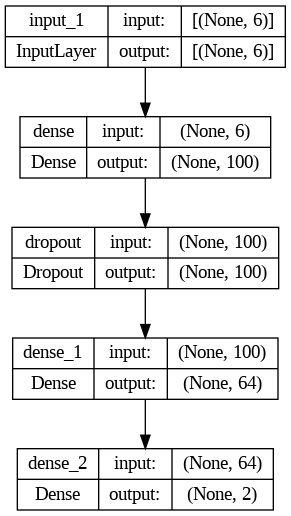

In [ ]:
tf.keras.utils.plot_model(model, 'dnn_model.png', show_shapes = True)

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 128
epochs = 100

#Early Stopping callback function
es = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    mode = 'max',
    restore_best_weights = True
)

In [ ]:
history = model.fit( inputset_train, train_one_hot, epochs = epochs, batch_size = batch_size, 
                    validation_split = 0.3, callbacks = [es])

Epoch 1/100
9749/9749 [==============================] - 38s 4ms/step - loss: 0.4895 - accuracy: 0.7601 - val_loss: 0.4785 - val_accuracy: 0.7657
Epoch 2/100
9749/9749 [==============================] - 40s 4ms/step - loss: 0.4898 - accuracy: 0.7603 - val_loss: 0.4729 - val_accuracy: 0.7677
Epoch 3/100
9749/9749 [==============================] - 39s 4ms/step - loss: 0.4888 - accuracy: 0.7607 - val_loss: 0.4737 - val_accuracy: 0.7690
Epoch 4/100
9749/9749 [==============================] - 35s 4ms/step - loss: 0.4893 - accuracy: 0.7609 - val_loss: 0.4803 - val_accuracy: 0.7638
Epoch 5/100
9749/9749 [==============================] - 40s 4ms/step - loss: 0.4886 - accuracy: 0.7605 - val_loss: 0.4846 - val_accuracy: 0.7631
Epoch 6/100
9749/9749 [==============================] - 41s 4ms/step - loss: 0.4880 - accuracy: 0.7606 - val_loss: 0.4742 - val_accuracy: 0.7663
Epoch 7/100
9749/9749 [==============================] - 35s 4ms/step - loss: 0.4877 - accuracy: 0.7609 - val_loss: 0.4757 -

In [ ]:
history.history

In [ ]:
scores = model.evaluate(inputset_test, test_one_hot, verbose = 1)
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]: .4f}')

9831/9831 [==============================] - 14s 1ms/step - loss: 0.4747 - accuracy: 0.7711
loss:  0.4747
accuracy:  0.7711
